In [1]:
import pandas as pd
import numpy as np
import folium
import matplotlib.pyplot as plt 
import requests
import seaborn as sns

In [2]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

import matplotlib.font_manager as fm

path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()

plt.rc('font', family=font_name)

fm._rebuild()

Selecting previously unselected package fonts-nanum.
(Reading database ... 144865 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [3]:
df  = pd.read_excel('/content/drive/MyDrive/Ulsan AirCar.xlsx', index_col='년월')
df.head()

,SO2,NO2,O3,CO,PM10,전기차,승용차
년월,,,,,,,
2018. 01,0.004,0.014,0.016,0.9,46,191,460716
2018. 02,0.004,0.020,0.023,0.7,49,193,461396
2018. 03,0.004,0.023,0.028,0.6,37,200,462642
2018. 04,0.003,0.023,0.021,0.6,59,225,463830
2018. 05,0.004,0.018,0.021,0.7,39,280,464640


In [4]:
df1 = pd.read_excel('/content/drive/MyDrive/Ulsan AirCar Plot.xlsx')
df2 = df1.set_index('종류')
df2.head()

,2018. 01,2018. 02,2018. 03,2018. 04,2018. 05,2018. 06,2018. 07,2018. 08,2018. 09,2018. 10,2018. 11,2018. 12,2019. 01,2019. 02,2019. 03,2019. 04,2019. 05,2019. 06,2019. 07,2019. 08,2019. 09,2019. 10,2019. 11,2019. 12,2020. 01,2020. 02,2020. 03,2020. 04,2020. 05,2020. 06
종류,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
SO2,0.004,0.004,0.004,0.003,0.004,0.004,0.006,0.004,0.005,0.003,0.003,0.004,0.003,0.003,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.003,0.003,0.003,0.003,0.003,0.003,0.003,0.004,0.005
NO2,0.014,0.020,0.023,0.023,0.018,0.014,0.012,0.013,0.017,0.017,0.024,0.022,0.026,0.028,0.025,0.026,0.026,0.023,0.017,0.017,0.019,0.022,0.024,0.026,0.026,0.023,0.019,0.016,0.015,0.017
O3,0.016,0.023,0.028,0.021,0.021,0.023,0.022,0.015,0.017,0.017,0.014,0.014,0.016,0.019,0.028,0.026,0.036,0.027,0.022,0.022,0.019,0.019,0.016,0.013,0.016,0.020,0.027,0.033,0.030,0.029
CO,0.900,0.700,0.600,0.600,0.700,0.700,0.700,0.700,0.800,0.600,0.900,0.900,0.800,0.700,0.800,0.700,0.600,0.600,0.600,0.800,0.700,0.600,0.600,0.700,0.700,0.700,0.600,0.600,0.700,0.700
PM10,46.000,49.000,37.000,59.000,39.000,32.000,31.000,20.000,24.000,28.000,44.000,36.000,36.000,46.000,45.000,36.000,39.000,28.000,25.000,28.000,27.000,27.000,32.000,33.000,32.000,33.000,33.000,36.000,33.000,30.000


In [5]:
df2.iloc[1,0:]

2018. 01    0.014
2018. 02    0.020
2018. 03    0.023
2018. 04    0.023
2018. 05    0.018
2018. 06    0.014
2018. 07    0.012
2018. 08    0.013
2018. 09    0.017
2018. 10    0.017
2018. 11    0.024
2018. 12    0.022
2019. 01    0.026
2019. 02    0.028
2019. 03    0.025
2019. 04    0.026
2019. 05    0.026
2019. 06    0.023
2019. 07    0.017
2019. 08    0.017
2019. 09    0.019
2019. 10    0.022
2019. 11    0.024
2019. 12    0.026
2020. 01    0.026
2020. 02    0.023
2020. 03    0.019
2020. 04    0.016
2020. 05    0.015
2020. 06    0.017
Name: NO2, dtype: float64

In [ ]:
df2.columns

Index(['2018. 01', '2018. 02', '2018. 03', '2018. 04', '2018. 05', '2018. 06',
       '2018. 07', '2018. 08', '2018. 09', '2018. 10', '2018. 11', '2018. 12',
       '2019. 01', '2019. 02', '2019. 03', '2019. 04', '2019. 05', '2019. 06',
       '2019. 07', '2019. 08', '2019. 09', '2019. 10', '2019. 11', '2019. 12',
       '2020. 01', '2020. 02', '2020. 03', '2020. 04', '2020. 05', '2020. 06'],
      dtype='object')

In [ ]:
plt.subplot(7,1,1)
plt.plot(df2.columns,df2.iloc[0,0:],label='SO2',color='r')
plt.subplot(7,1,2)
plt.plot(df2.columns,df2.iloc[1,0:])
plt.subplot(7,1,3)
plt.plot(df2.columns,df2.iloc[2,0:])
plt.subplot(7,1,4)
plt.plot(df2.columns,df2.iloc[3,0:])
plt.subplot(7,1,5)
plt.plot(df2.columns,df2.iloc[4,0:])
plt.subplot(7,1,6)
plt.plot(df2.columns,df2.iloc[5,0:])
plt.subplot(7,1,7)
plt.plot(df2.columns,df2.iloc[6,0:])
plt.figure(figsize=(90000,90000))
plt.show()

In [ ]:
sns.pairplot(df)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 <a list of 30 Text major ticklabel objects>)

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0, flags=flags)


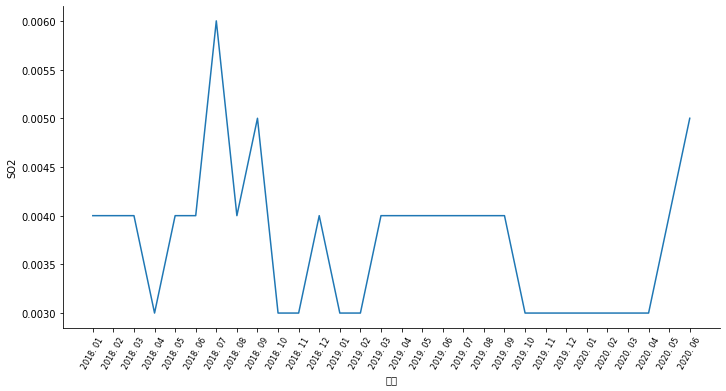

In [ ]:
sns.relplot(x="년월", y="SO2", data=df, kind='line', height=5, aspect=2)
plt.xticks(size=8,rotation=60)

In [ ]:
sns.relplot(x="년월", y="NO2", data=df, kind='line', height=5, aspect=2)
plt.xticks(size=8,rotation=60)

In [ ]:
sns.relplot(x="년월", y="O3", data=df, kind='line', height=5, aspect=2)
plt.xticks(size=8,rotation=60)

In [ ]:
sns.relplot(x="년월", y="CO", data=df, kind='line', height=5, aspect=2)
plt.xticks(size=8,rotation=60)

In [ ]:
sns.relplot(x="년월", y="PM10", data=df, kind='line', height=5, aspect=2)
plt.xticks(size=8,rotation=60)

In [ ]:
sns.relplot(x="년월", y="전기차", data=df, kind='line', height=5, aspect=2)
plt.xticks(size=8,rotation=60)

In [ ]:
sns.relplot(x="년월", y="승용차", data=df, kind='line', height=5, aspect=2)
plt.xticks(size=8,rotation=60)